<a href="https://colab.research.google.com/github/FranciscaAlliende/APS-Failure-at-Scania-Trucks/blob/master/Downsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# setup
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # to do: found lastest version
from sklearn.ensemble import RandomForestClassifier
# my libraries
import basic_prepro as bp
import null_values as nv
import evaluation_metrics as em

In [3]:
# load data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_training_set.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_test_set.csv')

In [4]:
# basic prepocessing
train = bp.data_prepro(train)
test = bp.data_prepro(test)

In [5]:
# null values
[y_train, X_train, y_test, X_test] = nv.null_values(train, test, t=0.5)

In [6]:
# transform the training set downsampling the majority class
classes = y_train.value_counts()

# split by classes
index_maj =  y_train.index[y_train == 0].tolist()
index_min = y_train.index[y_train == 1].tolist()
majority = X_train[X_train.index.isin(index_maj)]
minority = X_train[X_train.index.isin(index_min)]

# select data points from the majority
majority_downsampled = resample(majority, replace = False, n_samples = classes[1])

# merge
X_train_down = pd.concat([majority_downsampled, minority])
X_train_down.sort_index(inplace=True)

y_train_down = y_train[y_train.index.isin(X_train_down.index.tolist())]
y_train_down = y_train_down.reset_index(drop=True)

X_train_down = X_train_down.reset_index(drop=True)

In [7]:
# check
print(X_train.shape)
print(X_train_down.shape)
print(y_train.shape)
print(y_train_down.shape)

(60000, 162)
(2000, 162)
(60000,)
(2000,)


In [8]:
# clases distributions before
old_classes = y_train.value_counts()
old_classes

0    59000
1     1000
Name: class, dtype: int64

In [9]:

# clases distributions after
new_classes = y_train_down.value_counts()
new_classes

1    1000
0    1000
Name: class, dtype: int64

Total cost: 11540
False positives:  854
False negatives:  6
Confusion matrix, without normalization


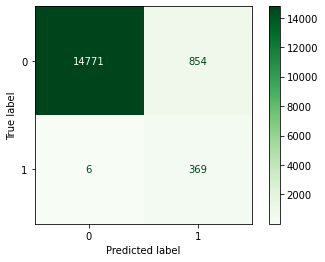

     Normalized confusion matrix


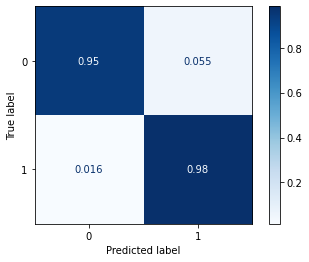

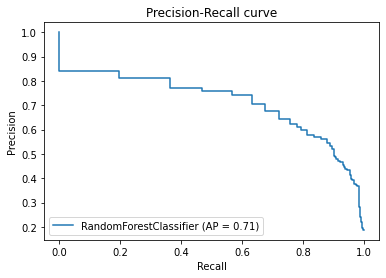

f1 score 0.462
precision:  0.302
recall 0.984


(11540, 0.4618272841051314, 0.3017170891251022, 0.984)

In [10]:
# RF
clf_RF = RandomForestClassifier(random_state=333)
# training 
clf_RF.fit(X_train_down, y_train_down.values)
# prediction
y_pred_RF = clf_RF.predict(X_test)
# evaluation
em.evaluation_metrics(y_pred_RF, y_test, X_test, clf_RF, c1=10, c2=500)

Total cost: 21990
False positives:  549
False negatives:  33
Confusion matrix, without normalization


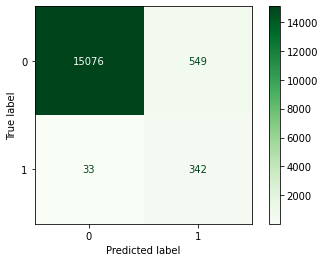

     Normalized confusion matrix


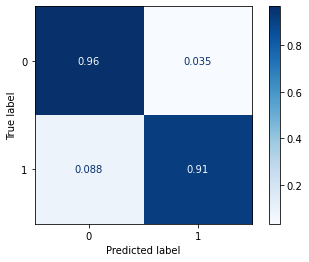

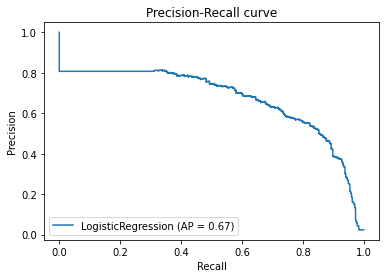

f1 score 0.54
precision:  0.384
recall 0.912


(21990, 0.5402843601895735, 0.3838383838383838, 0.912)

In [23]:
# LR
clf_LR = LogisticRegression(max_iter=1000, solver='liblinear')
# training 
clf_LR.fit(X_train_down, y_train_down.values)
# prediction
y_pred_LR = clf_LR.predict(X_test)
# evaluation
em. evaluation_metrics(y_pred_LR, y_test, X_test, clf_LR, c1=10, c2=500)

Total cost: 24200
False positives:  620
False negatives:  36
Confusion matrix, without normalization


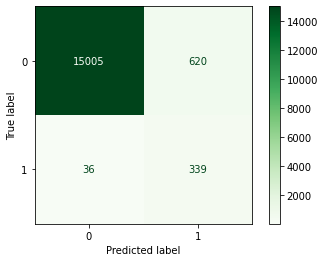

     Normalized confusion matrix


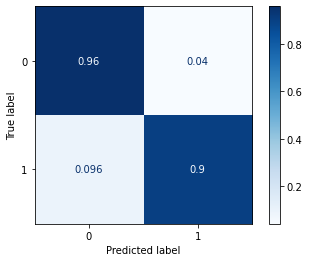

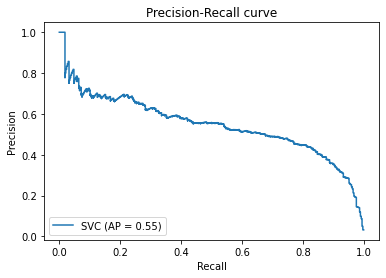

f1 score 0.508
precision:  0.353
recall 0.904


(24200, 0.5082458770614693, 0.3534932221063608, 0.904)

In [12]:
# SVM
clf_SVM = svm.SVC()
# training 
clf_SVM.fit(X_train_down, y_train_down.values)
# prediction
y_pred_SVM = clf_SVM.predict(X_test)
# evaluation
em. evaluation_metrics(y_pred_SVM, y_test, X_test, clf_SVM, c1=10, c2=500)